In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [2]:
# Function to load and preprocess image
def load_image(path_to_img, max_dim=512):
    img = Image.open(path_to_img)
    img = img.convert('RGB')
    long = max(img.size)
    scale = max_dim / long
    img = img.resize((round(img.size[0] * scale), round(img.size[1] * scale)))
    img = np.array(img)
    img = img.astype(np.float32)[np.newaxis, ...] / 255.
    return img

In [3]:
# Load content and style images
content_image = load_image("Mona_Lisa.jpg")
style_image = load_image("style.jpg")

In [16]:
# Load TensorFlow Hub model
hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

In [17]:
# Stylize image
stylized_image = hub_model(tf.constant(content_image), tf.constant(style_image))[0]

In [18]:
# Display images
def show_image(img, title=''):
    plt.imshow(np.squeeze(img))
    plt.title(title)
    plt.axis('off')

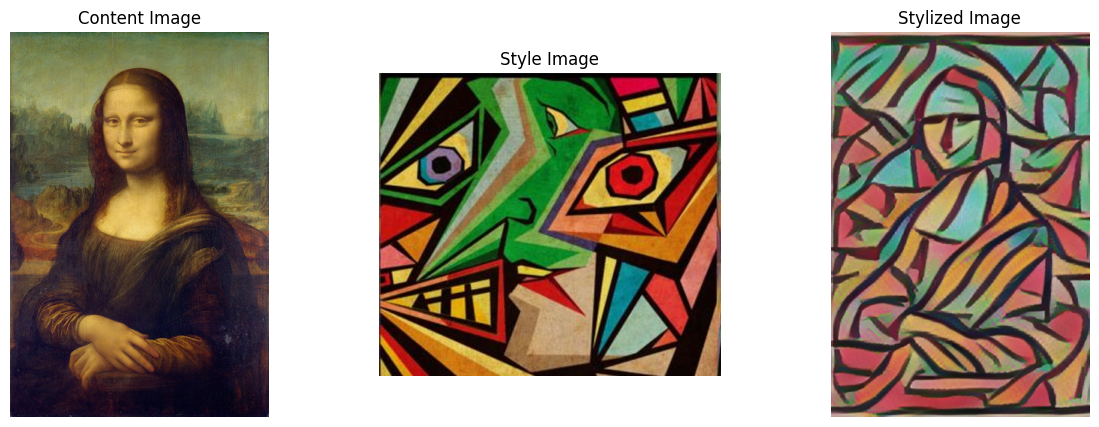

In [19]:
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
show_image(content_image, 'Content Image')

plt.subplot(1, 3, 2)
show_image(style_image, 'Style Image')

plt.subplot(1, 3, 3)
show_image(stylized_image, 'Stylized Image')
plt.show()